# ***Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

 It is a variant of the gradient descent optimization algorithm. SGD updates the model's parameters using the gradient of the cost function with respect to just one or a small random subset of training examples in each iteration.

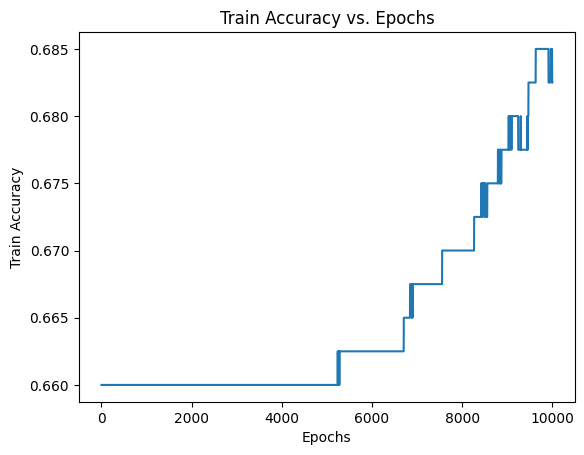

Test Accuracy: 0.74


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 1000
# Hypeparameters
TEST_SPLIT = 0.2
W_LOW = -0.05
W_HIGH = 0.05
EPOCHS = 10000
LR = 1e-4

np.random.seed(SEED)

# Reading data from file
data = pd.read_csv("sampled_data.csv")
y = data["Outcome"].values
y = y.reshape(-1, 1) # column vector
X = data.drop("Outcome", axis=1).values # feature matrix

# Normalization
mean = np.mean(X, axis=0) # along the column (top to bottom)
std = np.std(X, axis=0)
X_norm = (X - mean) / std

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=TEST_SPLIT)

# Adding biases
train_b = np.ones((X_train.shape[0], 1)) # bias term
test_b = np.ones((X_test.shape[0], 1)) # bias term
X_train_b = np.concatenate((train_b, X_train), axis=1) # added bias
X_test_b = np.concatenate((test_b, X_test), axis=1) # added bias

# Uniform initialization of weights
weights = np.random.uniform(W_LOW, W_HIGH, X_train_b.shape[1])

# Stochastic Gradient Descent
train_accuracies = []
for _ in range(EPOCHS):
    data_point = np.random.randint(low=0, high=X_train_b.shape[0])
    X_point, y_point = X_train_b[data_point], y_train[data_point]

    # Weight update
    y_pred = np.dot(X_point, weights)
    gradients = (y_point - y_pred) * X_point
    weights += LR * gradients

    # Calculate train accuracy
    predictions = np.dot(X_train_b, weights)
    predicted_classes = (predictions >= 0.5).astype(int) # Quantifying continuous prediction
    train_acc = accuracy_score(y_train, predicted_classes)
    train_accuracies.append(train_acc)

# Plot
plt.plot(range(EPOCHS), train_accuracies)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy vs. Epochs')
plt.show()

# Calculate Test Accuracy
y_test_pred = np.dot(X_test_b, weights)
# threshold = np.mean(y_test_pred) # Quantifying continuous prediction
threshold = 0.5
predicted_classes = (y_test_pred >= threshold).astype(int)

accuracy = accuracy_score(y_test, predicted_classes)

print("Test Accuracy: %.2f" % accuracy)

## **_Batch Gradient Descent_**

It is a gradient-based optimization method that is employed to minimize the cost or loss function associated with training a model. BGD is a deterministic algorithm, meaning it computes the gradient of the cost function with respect to all training examples in each iteration of the optimization process.

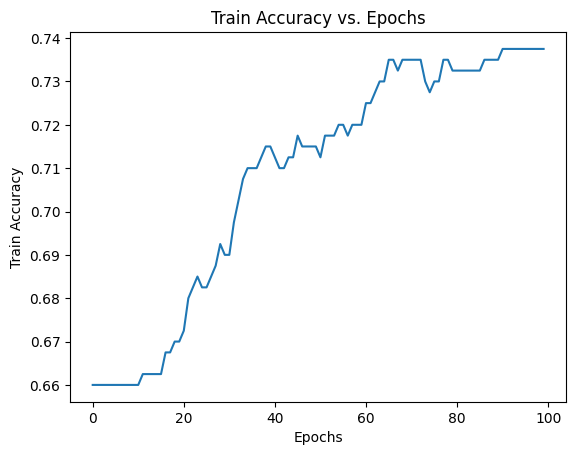

Test Accuracy: 0.85


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 1000
# Hyperparameters
TEST_SPLIT = 0.2
W_LOW = -0.05
W_HIGH = 0.05
EPOCHS = 100
LR = 1e-4

np.random.seed(SEED)

# Reading data from file
data = pd.read_csv("sampled_data.csv")
y = data["Outcome"].values
y = y.reshape(-1, 1) # column vector
X = data.drop("Outcome", axis=1).values # feature matrix

# Normalization
mean = np.mean(X, axis=0) # along the column (top to bottom)
std = np.std(X, axis=0)
X_norm = (X - mean) / std

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=TEST_SPLIT)

# Adding biases
train_b = np.ones((X_train.shape[0], 1)) # bias term
test_b = np.ones((X_test.shape[0], 1)) # bias term
X_train_b = np.concatenate((train_b, X_train), axis=1) # added bias
X_test_b = np.concatenate((test_b, X_test), axis=1) # added bias

# Uniform initialization of weights
weights = np.random.uniform(W_LOW, W_HIGH, X_train_b.shape[1])

# Batch Gradient Descent
train_accuracies = []
for _ in range(EPOCHS):
    y_pred = np.dot(X_train_b, weights).reshape(-1, 1) # converted to column vector (y_train)
    gradients = np.dot(X_train_b.T, (y_train - y_pred)).ravel() # converted to row vector (weights) (9,1) -> (9,)
    weights += LR * gradients

    # Calculate train accuracy
    predictions = np.dot(X_train_b, weights)
    predicted_classes = (predictions >= 0.5).astype(int) # Quantifying continuous prediction
    train_acc = accuracy_score(y_train, predicted_classes)
    train_accuracies.append(train_acc)

# Plot
plt.plot(range(EPOCHS), train_accuracies)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy vs. Epochs')
plt.show()

# Calculate Test Accuracy
y_test_pred = np.dot(X_test_b, weights)
predicted_classes = (y_test_pred >= 0.5).astype(int) # Quantifying continuous prediction
accuracy = accuracy_score(y_test, predicted_classes)

print("Test Accuracy: %.2f" % accuracy)

## **_Insights drawn (plots, markdown explanations)_**

Stochastic Gradient Descent (SGD) and Batch Gradient Descent (BGD) are two variants of the gradient descent optimization algorithm used for training machine learning models. They differ primarily in how they update model parameters and how they handle the dataset.

##Dataset
SGD: In SGD, only a single randomly selected training example (or a small mini-batch of examples) is used in each iteration to compute the gradient and update the model parameters. This makes it computationally efficient and well-suited for large datasets.

BGD: In BGD, the entire training dataset is used in each iteration to compute the gradient and update the model parameters. This ensures a more precise gradient estimate but can be computationally intensive, especially for large datasets.

##Convergence
SGD: SGD can converge more quickly than BGD because it updates the model parameters more frequently. However, this frequent updating can result in more erratic convergence behavior, and it may require more iterations to reach a stable solution.

BGD: BGD typically converges more slowly compared to SGD because it processes the entire dataset in each iteration. However, the updates are more consistent and stable, leading to smoother convergence.

##Graphically:
We can see that it takes batch gradient descent very less epochs to arrive at a similar accuracy compared to stochastic gradient descnet. But each epoch for BGD takes more time than SGD so overall the complexity is less for SGD